In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Read the data from the CSV file
df = pd.read_csv('clean_re_data.csv')

# Check the first few rows of the dataset to understand its structure
print(df.head())


     status      price  bed  bath  acre_lot  \
0  for_sale   110000.0  7.0   3.0      0.09   
1  for_sale   950000.0  5.0   4.0      0.99   
2  for_sale  6899000.0  4.0   6.0      0.83   
3  for_sale   525000.0  3.0   3.0      0.45   
4  for_sale   289900.0  3.0   2.0      0.36   

                              full_address                street  \
0       B-2 Monte Elena, Dorado, PR, 00949       B-2 Monte Elena   
1   46 Water Isle, Saint Thomas, VI, 00802         46 Water Isle   
2   10 Water Isle, Saint Thomas, VI, 00802         10 Water Isle   
3          955 River Rd, Agawam, MA, 01001          955 River Rd   
4  82 Harvey Johnson Dr, Agawam, MA, 01001  82 Harvey Johnson Dr   

           city           state  zip_code  house_size   sold_date  year  
0        Dorado     Puerto Rico     949.0      1192.0  2019-06-28  2019  
1  Saint Thomas  Virgin Islands     802.0      5000.0  2013-10-11  2013  
2  Saint Thomas  Virgin Islands     802.0      4600.0  2018-04-05  2018  
3        Aga

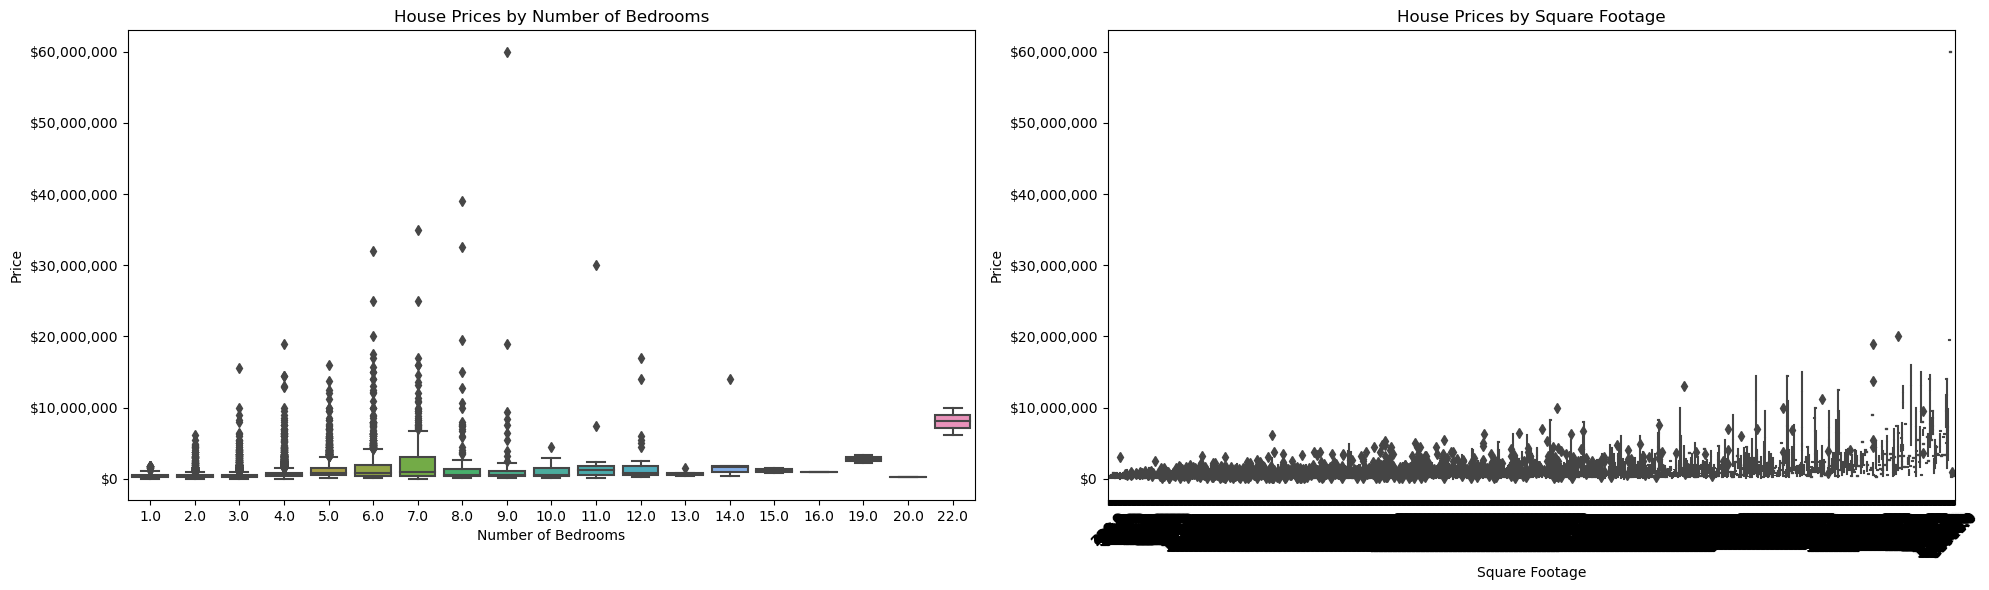

In [34]:
# Create a figure with two subplots, and increase the figure size even more
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Visualization 4: Boxplot for house prices by number of bedrooms with formatted y-axis labels
sns.boxplot(data=df, x='bed', y='price', ax=ax1)
ax1.set_title('House Prices by Number of Bedrooms')
ax1.set_xlabel('Number of Bedrooms')
ax1.set_ylabel('Price')
# Format y-axis labels to display prices in millions with commas
ax1.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# Visualization 5: Boxplot for house prices by square footage with formatted y-axis labels
sns.boxplot(data=df, x='house_size', y='price', ax=ax2)
ax2.set_title('House Prices by Square Footage')
ax2.set_xlabel('Square Footage')
ax2.set_ylabel('Price')
# Format y-axis labels to display prices in millions with commas
ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# Rotate the x-axis tick labels for better readability
ax2.tick_params(axis='x', labelrotation=45)

# Adjust the layout to avoid overlap between subplots
plt.tight_layout()

# Save the combined plot as an image (e.g., PNG format)
plt.savefig('combined_plot.png', dpi=300)

# Show the combined plot
plt.show()

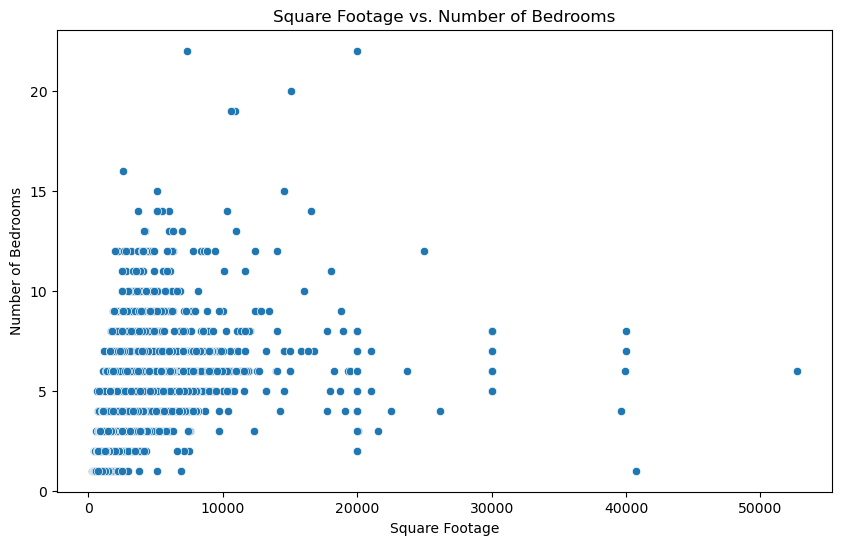

In [21]:
# Visualization: Scatter plot of square footage vs. number of bedrooms
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='house_size', y='bed')
plt.title('Square Footage vs. Number of Bedrooms')
plt.xlabel('Square Footage')
plt.ylabel('Number of Bedrooms')
plt.show()

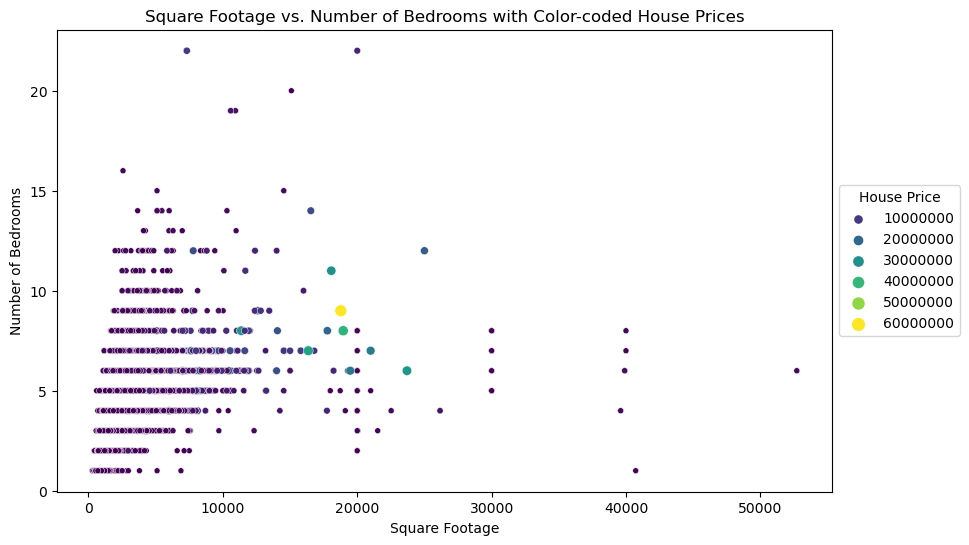

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data from the CSV file
df = pd.read_csv('clean_re_data.csv')

# Visualization: Scatter plot of square footage vs. number of bedrooms with color-coded house prices
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='house_size', y='bed', hue='price', palette='viridis', size='price')
plt.title('Square Footage vs. Number of Bedrooms with Color-coded House Prices')
plt.xlabel('Square Footage')
plt.ylabel('Number of Bedrooms')
plt.legend(title='House Price', loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()


In [24]:
# Calculate the average house price for each state
average_prices_by_state = df.groupby('state')['price'].mean().reset_index()

# Sort the states based on average house prices in descending order
average_prices_by_state = average_prices_by_state.sort_values(by='price', ascending=False)

# Get the state with the highest average house price (the first row in the sorted DataFrame)
most_expensive_state = average_prices_by_state.iloc[0]['state']
highest_average_price = average_prices_by_state.iloc[0]['price']

# Print the state with the highest average house price
print(f"The state with the most expensive houses is {most_expensive_state} with an average price of ${highest_average_price:,.0f}.")

The state with the most expensive houses is Virgin Islands with an average price of $3,924,500.


In [35]:
# Select the relevant columns for correlation analysis
selected_columns = df[['house_size', 'price', 'bed']]

# Calculate the correlation matrix
correlation_matrix = selected_columns.corr()

# Extract the correlation coefficients
correlation_sqft_price = correlation_matrix.loc['house_size', 'price']
correlation_sqft_bed = correlation_matrix.loc['house_size', 'bed']
correlation_price_bed = correlation_matrix.loc['price', 'bed']

# Print the correlation coefficients
print(f"Correlation between Square Footage and Price: {correlation_sqft_price:.2f}")
print(f"Correlation between Square Footage and Number of Bedrooms: {correlation_sqft_bed:.2f}")
print(f"Correlation between Price and Number of Bedrooms: {correlation_price_bed:.2f}")

Correlation between Square Footage and Price: 0.46
Correlation between Square Footage and Number of Bedrooms: 0.49
Correlation between Price and Number of Bedrooms: 0.29
